# Property Price Prediction using King County House Sales dataset
Buying a property is the most expensive purchase a person can make. People want to buy a property to live in it or invest in. Property can be used as long term investment stratergy. There may be lot of sentimental values associated with a property. However it is important to use rational thinking when purchasing a property. Otherwise a person can end up paying way more which will cost them a huge amount long term. 

I am going to use Data Analytics principle to estimate property price. This will give buyer comfort of knowing the property price is the right one or not. 
Ideally we should to use real world data. However, getting real world data can be challenge in itself.
For purpose of this project I am going to use King County House Sales dataset to predict the House prices.
This dataset may not be relevant for Australian property market, However once I create a model to develope a model the same model can be applied to real world data later on. 

## King County House Sales dataset
King County House Sales dataset is sourced from https://www.kaggle.com/datasets/harlfoxem/housesalesprediction
This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

King County is a county located in the U.S. state of Washington. The population was 2,149,970 in a 2016 census estimate. King is the most populous county in Washington, and the 13th-most populous in the United States. The county seat is Seattle, which is the state’s largest city. King County is one of three Washington counties that are included in the Seattle-Tacoma-Bellevue metropolitan statistical area. About two-thirds of King County’s population lives in the city’s suburbs. As of 2011, King County was the 86th highest-income county in the United States. 

## Variable of Interest
As stated earlier Price plays a big role in the decision to purchase a home. This analysis will use techniques such as multiple linear regression to study the relationship between the price and other variables present in the dataset, with the hope of helping potential home buyers understand the King County housing market and estimate a price for a home they desire.

In [1]:
# Importing all the libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # basic plotting 

import statsmodels.api as sm
import statsmodels.formula.api as smf

import seaborn as sns
from itertools import combinations

from geopy.distance import geodesic as GD
from statsmodels.tools.eval_measures import rmse

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy import stats

plt.style.use('ggplot')
%matplotlib inline 

I will import the file data in to pandas dataframe

In [2]:
kchousedf = pd.read_csv("Data\\kc_house_data.txt",index_col=[0])
kchousedf 

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


After looking at the dataset I can see the dataset has 21597 rows × 21 columns. Price column is the one of interest and the one we want to use for prediction. 
I need to understand the dataset more to effectively predict the house price
I am getting the dataset info with the following statement

In [3]:
#To get a concise summary of the dataframe, you can use .info():
kchousedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

I will use describe to get more information on the dataset. 

In [4]:
kchousedf.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Date is the only column with Dtype as object and contains date time value. I will split the column in month and date to get discreet values

In [5]:
kchousedf['date']=pd.to_datetime(kchousedf['date'])
kchousedf['year_sold'] = pd.DatetimeIndex(kchousedf['date']).year
kchousedf['month_sold'] = pd.DatetimeIndex(kchousedf['date']).month
kchousedf.drop(columns='date',inplace=True)
cols_date = ['year_sold','month_sold']

I will also count number of unique values and number of nan values in each column

In [6]:
cols = kchousedf.columns.to_list()
decribeDf =pd.DataFrame({'unique': [kchousedf[column].nunique() for column in kchousedf.columns],\
                        'nan_proportion':[(sum(kchousedf[column].isnull())/len(kchousedf[column])) * 100 \
                          for column in kchousedf.columns]},index=cols)
decribeDf.T

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,month_sold
unique,3622.0,12.0,29.0,1034.0,9776.0,6.0,2.000000,5.000000,5.0,11.0,...,304.0,116.0,70.000000,70.0,5033.0,751.0,777.0,8682.0,2.0,12.0
nan_proportion,0.0,0.0,0.0,0.0,0.0,0.0,11.001528,0.291707,0.0,0.0,...,0.0,0.0,17.789508,0.0,0.0,0.0,0.0,0.0,0.0,0.0


I will fill waterfront and view Nan values with 0  <br>
If yr_renovated is nan then it was never renovated. So yr_renovated will be equal to yr_built

In [7]:
kchousedf['waterfront'].fillna(0,inplace=True)
kchousedf['waterfront'].astype(int)
kchousedf['view'].fillna(0,inplace=True)
kchousedf['view'].astype(int)

kchousedf['yr_renovated'].replace(0,np.nan,inplace=True)
kchousedf['yr_renovated'].fillna( kchousedf['yr_built'],inplace=True)

kchousedf['age_built'] = kchousedf['year_sold'] - kchousedf['yr_built']
kchousedf['renovated'] = np.where( kchousedf['year_sold'] - kchousedf['yr_renovated'] < 5, 1,0)
kchousedf.drop(columns='yr_built',inplace=True)
kchousedf.drop(columns='yr_renovated',inplace=True)

I inspected potential mutlicollinearity with a heatmap to see how the independent variables might be correlated

In [8]:
corr = kchousedf.corr().abs()
corr.style.format('{:,.2}').background_gradient(cmap=plt.get_cmap('coolwarm'),axis=1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,month_sold,age_built,renovated
price,1.0,0.31,0.53,0.7,0.09,0.26,0.26,0.39,0.036,0.67,0.61,0.053,0.31,0.022,0.59,0.083,0.0037,0.0099,0.054,0.071
bedrooms,0.31,1.0,0.51,0.58,0.032,0.18,0.0021,0.078,0.026,0.36,0.48,0.15,0.01,0.13,0.39,0.031,0.0099,0.001,0.16,0.079
bathrooms,0.53,0.51,1.0,0.76,0.088,0.5,0.064,0.19,0.13,0.67,0.69,0.2,0.024,0.22,0.57,0.088,0.027,0.0075,0.51,0.19
sqft_living,0.7,0.58,0.76,1.0,0.17,0.35,0.1,0.28,0.059,0.76,0.88,0.2,0.052,0.24,0.76,0.18,0.029,0.012,0.32,0.11
sqft_lot,0.09,0.032,0.088,0.17,1.0,0.0048,0.021,0.075,0.0088,0.11,0.18,0.13,0.086,0.23,0.14,0.72,0.0056,0.0026,0.053,0.054
floors,0.26,0.18,0.5,0.35,0.0048,1.0,0.021,0.028,0.26,0.46,0.52,0.06,0.049,0.13,0.28,0.011,0.022,0.014,0.49,0.24
waterfront,0.26,0.0021,0.064,0.1,0.021,0.021,1.0,0.38,0.017,0.083,0.072,0.029,0.012,0.038,0.084,0.031,0.005,0.0082,0.024,0.016
view,0.39,0.078,0.19,0.28,0.075,0.028,0.38,1.0,0.046,0.25,0.17,0.085,0.0063,0.078,0.28,0.073,0.0012,0.0052,0.054,0.03
condition,0.036,0.026,0.13,0.059,0.0088,0.26,0.017,0.046,1.0,0.15,0.16,0.0029,0.015,0.11,0.093,0.0031,0.046,0.022,0.36,0.16
grade,0.67,0.36,0.67,0.76,0.11,0.46,0.083,0.25,0.15,1.0,0.76,0.19,0.11,0.2,0.71,0.12,0.031,0.009,0.45,0.15


Check for Multicollenearity of the features

In [9]:
def Multicollinear_Features():
    corr = kchousedf.corr().abs()
    features = []
    correlations = []
    for idx, correlation in corr['price'].T.iteritems():
        if correlation >= .3 and idx != 'price':
            features.append(idx)
            correlations.append(correlation)
    corr_price_df = pd.DataFrame({'Correlations':correlations, 'Features': features})
    Multicollinear_Features = []
    def check_multicollinearity(feature):
        for idx, correlation in corr[feature].T.iteritems():
            if correlation >= .8 and idx != feature and corr['price'].loc[feature] >= corr['price'].loc[idx]:
                Multicollinear_Features.append({'Correlations':correlation,'Features':feature,'idx': idx})

    for feature in corr:
        check_multicollinearity(feature)
    if len(Multicollinear_Features) > 0:
        MC_df = pd.DataFrame(Multicollinear_Features)
    else:
        MC_df = pd.DataFrame(columns=['Correlations', 'Features','idx'])
    print('Multicollinear Features')
    MC_df.sort_values(by='Correlations',ascending=False,inplace=True)
    MC_df.reset_index(drop=True,inplace=True)
    display(MC_df)
    #print(list(set(MC_df['idx'].to_list())))
    #print(list(set(corr_price_df['Correlations'].to_list())))

    corr_price_df.sort_values(by='Correlations',ascending=False,inplace=True)
    corr_price_df.reset_index(drop=True,inplace=True)
    print('Correlations with Price')
    corr_price_df = corr_price_df.loc[~corr_price_df['Features'].isin(MC_df['idx'].to_list())]
    display(corr_price_df)
    return(MC_df,corr_price_df)

MC_df,corr_price_df=Multicollinear_Features()

Multicollinear Features


,Correlations,Features,idx
0,0.876448,sqft_living,sqft_above


Correlations with Price


,Correlations,Features
0,0.701917,sqft_living
1,0.667951,grade
3,0.585241,sqft_living15
4,0.525906,bathrooms
5,0.393497,view
6,0.308787,bedrooms
7,0.306692,lat


Running stepwise_selection to choose the best features

In [10]:


def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    removed = []
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included) - set(removed))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature =model.pvalues.idxmax()
            included.remove(worst_feature)
            removed.append(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(kchousedf[corr_price_df['Features'].to_list()], kchousedf['price'], verbose=True)
print('resulting features:')
#result = result[:-1]
result =corr_price_df.loc[corr_price_df['Features'].isin(result)]['Features'].to_list()
print(result)

Add  bedrooms                       with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add  view                           with p-value 0.0
Add  lat                            with p-value 0.0
Add  grade                          with p-value 1.5791e-296
Add  bathrooms                      with p-value 1.37044e-05
resulting features:
['sqft_living', 'grade', 'bathrooms', 'view', 'bedrooms', 'lat']


To exclude buildings that likely aren’t single-family homes, I checked for outliers in the bedrooms column using the following code format:

In [11]:
#cols = ['bedrooms']
#count = 0
#for col in cols:
#    if col in kchousedf.columns.to_list():
#        mean = np.mean(kchousedf[col])
#        max_distance = np.std(kchousedf[col]) * 3 
#        condition =((kchousedf[col] < (mean - max_distance)) | (kchousedf[col] > (mean + max_distance)))
#        count +=len(kchousedf.loc[condition])
#        kchousedf.drop(kchousedf.loc[condition].index,inplace=True)
#print('outliers deleted ' + str(count))
#len(kchousedf)

In [12]:
cols = ['bedrooms']
Q1 = kchousedf[cols].quantile(0.25)
Q3 = kchousedf[cols].quantile(0.75)
IQR = Q3 - Q1
condition = ((kchousedf[cols] < (Q1 - 1.5 * IQR)) |(kchousedf[cols] > (Q3 + 1.5 * IQR))).any(axis=1)
print('Total outliers found '+str(len(kchousedf[condition])))
kchousedf = kchousedf[~condition]

Total outliers found 530


As per the results lat (lattitue) column is significantly correlated to price. However lattitude in itself is meanigless.<br>
I will create simple Seaborn scatterplot to shows home by their latitude and longitude, with price set as the hue.

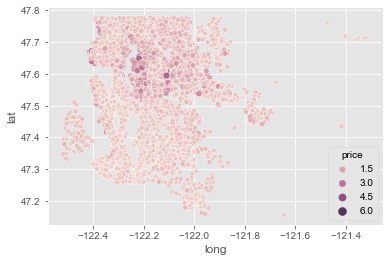

In [13]:
fig = sns.scatterplot(data=kchousedf, x='long', y='lat', size='price', hue='price')
sns.set(rc={'figure.figsize':(6,5)})
plt.show()

I notice that, price seems to go down as homes are further away from downtown<br>
I will create distance from downtown Seattle as another feature utilizing the geopy library. 

In [14]:
def getdistance(lat, long):
    lat_long = (lat, long)
    Seattle = (47.6062, -122.3321)
    return GD(lat_long,Seattle).km
kchousedf['distance'] = kchousedf.apply(lambda x: getdistance(x.lat, x.long), axis=1)

remove all the insignificant features from the dataset.

In [15]:
result.remove('lat')
result.append('distance')
kchousedf = kchousedf[['price'] + result]

Get the count for each unique values for discrete variables.

In [16]:
decribeDf =pd.DataFrame({'unique':[kchousedf[column].nunique() for column in kchousedf.columns]},\
                        index=kchousedf.columns.to_list())
display(decribeDf.T)
values = []
discrete_cols = []
for col, value in decribeDf[decribeDf['unique'] <=30]['unique'].iteritems():
    if (col in result):
        values.append(kchousedf[col].value_counts().sort_index().reset_index()\
                      .rename(columns={'index':col + '_value',col:col + '_count'}))
        discrete_cols.append(col)
valuesDf = pd.concat(values,axis=1)
valuesDf

,price,sqft_living,grade,bathrooms,view,bedrooms,distance
unique,3568,997,10,26,5,4,20325


,grade_value,grade_count,bathrooms_value,bathrooms_count,view_value,view_count,bedrooms_value,bedrooms_count
0,4.0,15.0,0.50,3,0.0,19037.0,2.0,2760.0
1,5.0,202.0,0.75,44,1.0,322.0,3.0,9824.0
2,6.0,1952.0,1.00,3706,2.0,923.0,4.0,6882.0
3,7.0,8800.0,1.25,7,3.0,489.0,5.0,1601.0
4,8.0,5944.0,1.50,1425,4.0,296.0,NaN,NaN
5,9.0,2574.0,1.75,3027,NaN,NaN,NaN,NaN
6,10.0,1105.0,2.00,1899,NaN,NaN,NaN,NaN
7,11.0,381.0,2.25,2025,NaN,NaN,NaN,NaN
8,12.0,84.0,2.50,5343,NaN,NaN,NaN,NaN
9,13.0,10.0,2.75,1148,NaN,NaN,NaN,NaN


Bathrooms contains some fractional values. I will round them to nearest integer.<br>
I will transform the view column to binary 0 and 1. Houses without view = 0 and Houses with view = 1

In [17]:
#Bathrooms contains some fractional values. I will round them to nearest integer.
if 'bathrooms' in kchousedf.columns.to_list():
    kchousedf['bathrooms'] =kchousedf['bathrooms'].round().astype(int)
if 'view' in kchousedf.columns.to_list():
        kchousedf['view'] =kchousedf['view'].apply(lambda x: 0 if x==0 else 1)

Plot bar graoh for all the descrete features

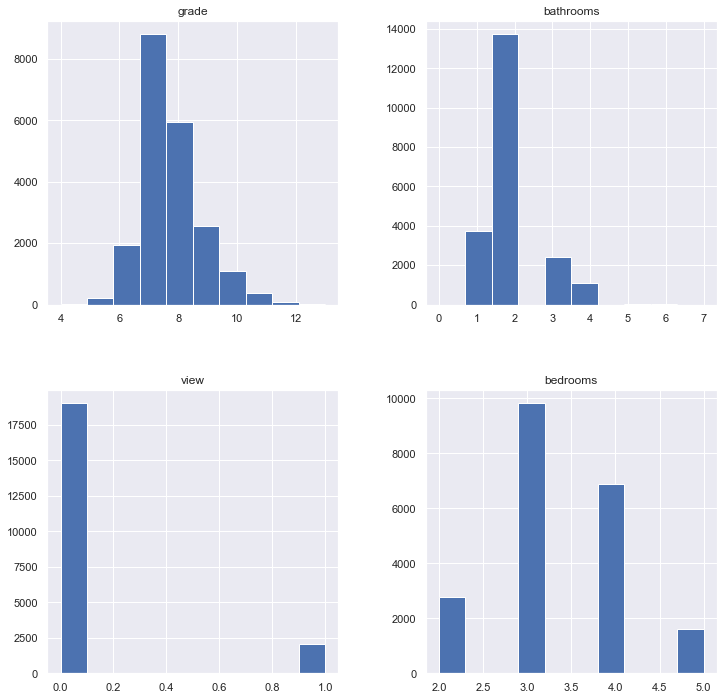

In [18]:
discrete_cols
fig = plt.figure(figsize = (12,12))
ax = fig.gca()
kchousedf[discrete_cols].hist(ax = ax);

I will transform the continuous variables using MinMaxScaler

In [19]:
collist = decribeDf[decribeDf['unique'] >30].index.to_list()
# define standard scaler
#scaler = StandardScaler()
scaler = MinMaxScaler()
scaled = scaler.fit_transform(kchousedf[collist])
scaledDf = pd.DataFrame(scaled,columns=collist,index=kchousedf.index)
kchousedf = pd.concat([scaledDf, kchousedf[discrete_cols]],axis=1)
kchousedf

,price,sqft_living,distance,grade,bathrooms,view,bedrooms
id,,,,,,,
7129300520,0.020610,0.077083,0.144080,7,1,0,3
6414100192,0.065884,0.221875,0.154857,7,2,0,3
5631500400,0.014609,0.034375,0.202351,6,1,0,2
2487200875,0.075337,0.158333,0.125255,7,3,0,4
1954400510,0.061873,0.129167,0.270396,8,2,0,3
...,...,...,...,...,...,...,...
263000018,0.040390,0.113542,0.123429,8,2,0,3
6600060120,0.046119,0.194792,0.129326,8,2,0,4
1523300141,0.046420,0.060417,0.023954,7,1,0,2


I will plot a distplot with kde overlay for all the continuous features

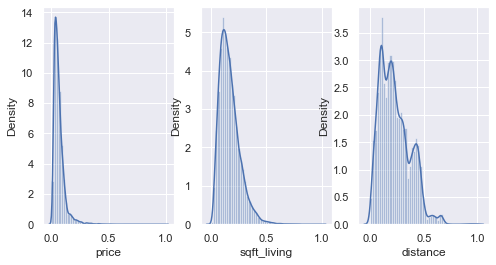

In [20]:
fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(8,4))
for col,ax in zip(scaledDf.columns.to_list(),axes):
    sns.distplot(scaledDf[col],hist=True,kde=True,rug=False,label=col,norm_hist=True,ax=ax);

I will create scatter plot for all the variables against price

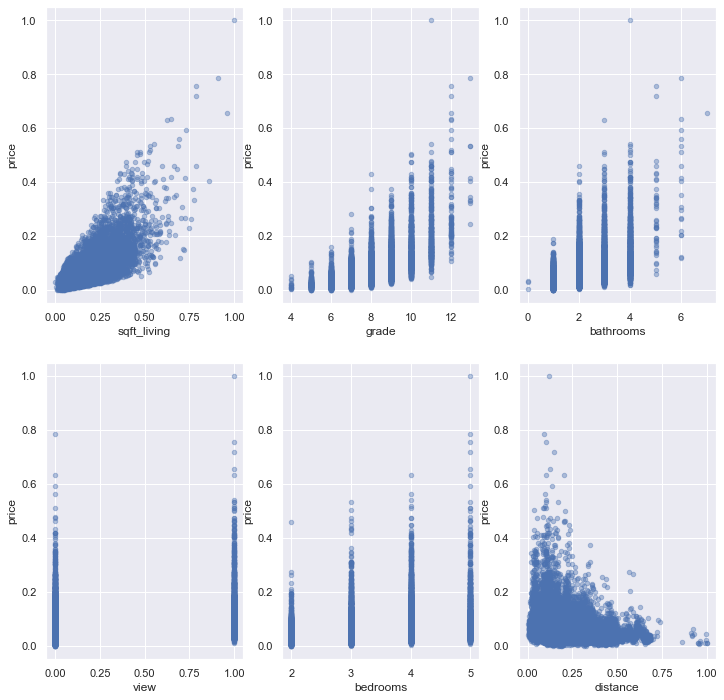

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,12))
cols=result
axe = axes.ravel()
for xcol, ax in zip(cols, axe):
    kchousedf.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b',legend=True)

Lets build different models based on these features and compare them so we can choose the best fit

In [22]:
cols= kchousedf.columns.to_list()
cols =list(set(cols) - set(['price']))
models = []
def getFormula(cols):
    strformula = ''
    for col in cols:
        if strformula == '':
            strformula ='price' + ' ~ ' + col
        else:
            strformula += ' + ' + col
    return(strformula)        
            
        
for itm in range(1,len(cols)):
    for comb in list(combinations(cols, itm)):
        strformula =getFormula(list(comb)) 
        models.append({'formula':strformula,'model':smf.ols(formula=strformula, data=kchousedf).fit()})

Calculate root mean square error for each model 

In [23]:
rmselist = []
for model in models:
    predictions = model['model'].predict(exog=kchousedf)
    rmselist.append({'formula': model['formula'],'model':model['model'],\
                     'predict':predictions,'rmse':rmse(kchousedf['price'], predictions)})

Select the model with smallest rmse

In [26]:

rmseDf = pd.DataFrame(rmselist)
selectedmodel = rmseDf.loc[rmseDf['rmse'] == rmseDf['rmse'].min()]
selected_formula = selectedmodel['formula'].iloc[0]
display(selected_formula)
selected_model =selectedmodel['model'].iloc[0]
selected_predictions = selectedmodel['predict'].iloc[0]
display(selected_model.summary())

'price ~ bedrooms + distance + sqft_living + view + grade'

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     8368.
Date:                Tue, 07 Jun 2022   Prob (F-statistic):               0.00
Time:                        22:02:39   Log-Likelihood:                 44360.
No. Observations:               21067   AIC:                        -8.871e+04
Df Residuals:                   21061   BIC:                        -8.866e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.0301      0.002    -14.824      0.000      -0.034      -0.026
bedrooms       -0.0054      0.000    -17.139      0.000      -0.006      -0.005
distance       -0.1163      0.001    -78.761      0.000      -0.119      -0.113
sqft_living     0.2960      0.004     73.662      0.000       0.288       0.304
view            0.0227      0.001     31.456      0.000       0.021       0.024
grade           0.0115      0.000     41.766      0.000       0.011       0.012
==============================================================================
Omnibus:                    16264.429   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           936347.845
Skew:                           3.224   Prob(JB):                         0.00
Kurtosis:                      35.018   Cond. No.                         181.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Create a Q-Q plot to prove normal distribution

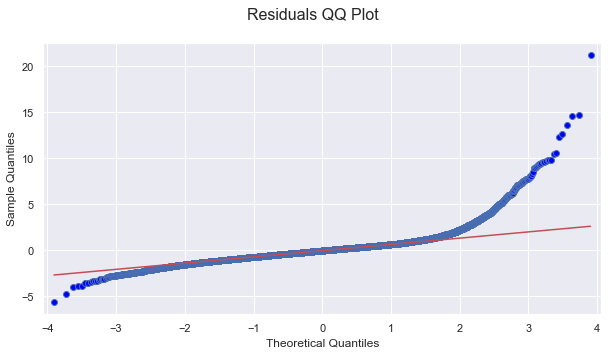

In [27]:
residuals = selected_model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='q', fit=True)
fig.suptitle('Residuals QQ Plot', fontsize=16)
fig.set_size_inches(10, 5)
fig.show()

Create Scatterplot to see distrubution of actual values against predicted values

Text(0.5, 0.99, 'Residuals Scatterplot')

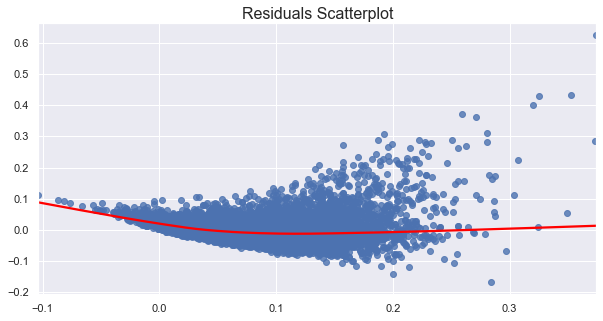

In [28]:
plt.figure(figsize=(10,5))
sns.regplot(x=selected_predictions, y=selected_model.resid, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals Scatterplot', fontsize=16, y=.99)

### Model Validation
The final step in evaluating the quality of the model is cross-validation, which gives us an idea of how the model would perform with new data for the same variables. I used sklearn’s train_test_split function to split the data into two subsets: one that the model will be trained on, and another that it will be tested on. By default, the function takes 75% of the data as the training subset and the other 25% as its test subset.

In [32]:
from sklearn.model_selection import train_test_split
X = kchousedf.drop('price', axis=1)
y = kchousedf['price']
X_train, X_test, y_train, y_test = train_test_split(X, y)
y_hat_train = selected_model.predict(X_train)
y_hat_test = selected_model.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

train_mse = rmse(y_train, y_hat_train)
test_mse = rmse(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

Train Mean Squared Error: 0.029214453897337515
Test Mean Squared Error: 0.030196696010002737


### Conclusions
bedrooms + distance + sqft_living + view + grade function as the best predictors of a house’s price in King County. The model does have some limitations: given that some of the variables needed to be log-transformed to satisfy regression assumptions, any new data used with the model would have to undergo similar preprocessing. 